In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [22]:
df=pd.read_csv(r"C:\Users\singh\OneDrive\Documents\Udemy Regression Analysis\Course Materials\Data\San_Francisco.csv")
df.head(20)

,PRICE,SQFT,BEDS,BATH,LAUNDRY,PETS,HOUSING_TYPE,PARKING,HOOD_DISTRICT
0,6800,1600,2,2.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,7
1,3500,550,1,1.0,(a) in-unit,(a) both,(c) multi,(b) protected,7
2,5100,1300,2,1.0,(a) in-unit,(a) both,(c) multi,(d) no parking,7
3,9000,3500,3,2.5,(a) in-unit,(d) no pets,(c) multi,(b) protected,7
4,3100,561,1,1.0,(c) no laundry,(a) both,(c) multi,(d) no parking,7
5,3800,800,2,1.0,(b) on-site,(c) cats,(c) multi,(b) protected,9
6,3100,750,1,1.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,8
7,3000,650,1,1.0,(b) on-site,(a) both,(c) multi,(d) no parking,7
8,3000,650,1,1.0,(b) on-site,(a) both,(c) multi,(b) protected,7
9,3200,650,1,1.0,(a) in-unit,(c) cats,(c) multi,(b) protected,9


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.histplot(np.log10(df["PRICE"]))

In [23]:
df["HOOD_DISTRICT"]=df["HOOD_DISTRICT"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRICE          989 non-null    int64  
 1   SQFT           989 non-null    int64  
 2   BEDS           989 non-null    int64  
 3   BATH           989 non-null    float64
 4   LAUNDRY        989 non-null    object 
 5   PETS           989 non-null    object 
 6   HOUSING_TYPE   989 non-null    object 
 7   PARKING        989 non-null    object 
 8   HOOD_DISTRICT  989 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 69.7+ KB


In [ ]:
df[""]= df[""].astype(float)

In [ ]:
df["LAUNDRY"].value_counts().plot.bar()

In [ ]:
df["HOUSING_TYPE"].value_counts().plot.bar()

In [ ]:
df["PETS"].value_counts().plot.bar()

In [ ]:
df["PARKING"].value_counts().plot.bar()

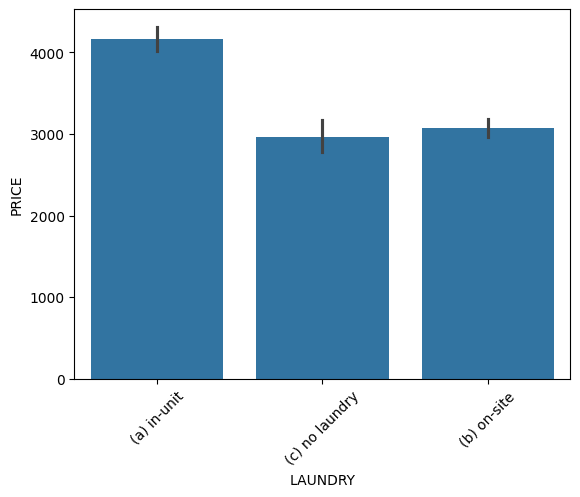

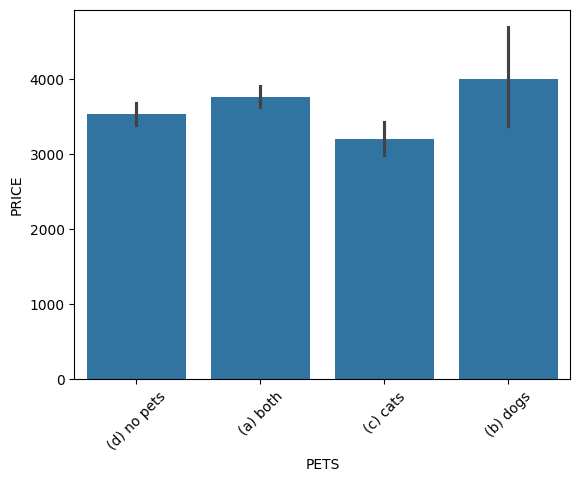

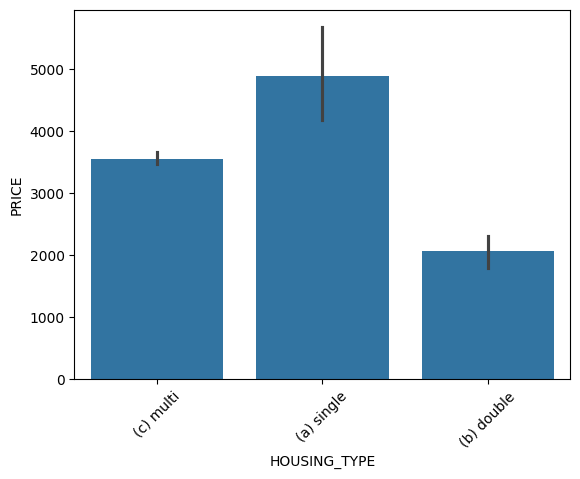

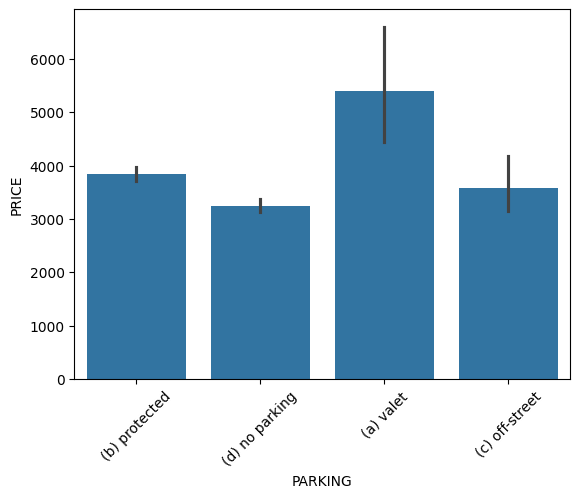

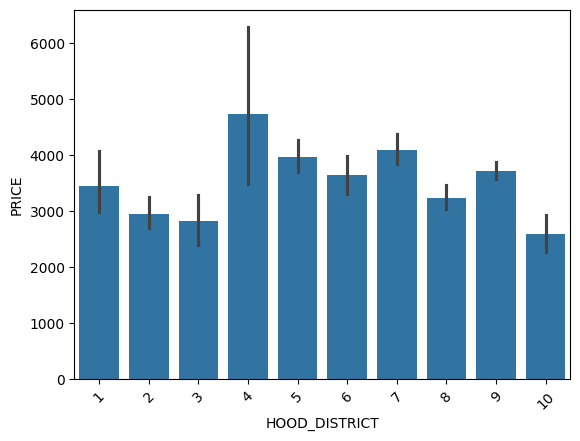

In [24]:
def cat_plotter(data,target):
    for col in data.select_dtypes(["object"]).columns:
        sns.barplot(data=data ,x=col, y=target)
        plt.xticks(rotation=45)
        plt.show()
cat_plotter(df,"PRICE")
        
    

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,vmax=1 ,cmap="coolwarm")

In [ ]:
sns.scatterplot(df,x="SQFT",y="PRICE",hue="PETS")

In [ ]:
sns.pairplot(df,corner=True)

In [25]:
def value_count(dataframe):
    value_series=pd.DataFrame()
    for col in dataframe.select_dtypes(["object"]).columns:
        print(df[col].value_counts())
    
value_count(df)   
    

LAUNDRY
(a) in-unit       488
(b) on-site       370
(c) no laundry    131
Name: count, dtype: int64
PETS
(d) no pets    510
(a) both       367
(c) cats        91
(b) dogs        21
Name: count, dtype: int64
HOUSING_TYPE
(c) multi     937
(a) single     40
(b) double     12
Name: count, dtype: int64
PARKING
(d) no parking    478
(b) protected     439
(c) off-street     38
(a) valet          34
Name: count, dtype: int64
HOOD_DISTRICT
9     332
8     207
7     123
5     106
6      62
2      51
1      50
10     33
3      14
4      11
Name: count, dtype: int64


In [ ]:
def value_count(data,target):
    for col in data.select_dtypes(["object"]).columns:
        sns.barplot(data=data,x=col,y=target)
        plt.xticks(rotation=45)
        plt.show()
    
value_count(df,"PRICE")   
    

In [ ]:
df.drop_duplicates()

In [34]:
# Feature Engineering
laundry_map={"(a) in-unit":"in-unit",
        "(b) on-site":"not_in_unit",
        "(c) no laundry":"not_in_unit"}

pets_map={"(d) no pets":"no_dogs",
          "(c) cats":"no_dogs",
          "(b) dogs":"dogs",
          "(a) both":"dogs"}
housing_type_map={
    "(a) single":"single","(b) double":"multi","(c) multi":"multi"
}

district_map={
    1.0:"west",
    2.0:"south west",
    3.0:"south west",
    4.0:"central",
    5.0:"central",
    6.0:"central",
    7.0:"marina",
    8.0:"north beach",
    9.0:"FIDI/SOMA",
    10.0:"south west"
    
}


In [63]:
# Feature Engineering 

eng_df=df.assign(
   HOOD_DISTRICT=df["HOOD_DISTRICT"].map(district_map),
    PETS=df["PETS"].map(pets_map),
    LAUNDRY=df['LAUNDRY'].map(laundry_map),
    HOUSING_TYPE=df['HOUSING_TYPE'].map(housing_type_map),
    SQFT2=df["SQFT"]**2,
    SQFT3=df["SQFT"]**3,
    BEDS2=df["BEDS"]**2,
    BEDS3=df["BEDS"]**3,
    BATH2=df["BATH"]**2,
    BATH3=df["BATH"]**3
)
eng_df=pd.get_dummies(eng_df,drop_first=True)

In [72]:
def remove_bool(value):
    return value.replace(True, 1)

def remove_false(value):
    return value.replace(False, 0)

eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRICE                      989 non-null    int64  
 1   SQFT                       989 non-null    int64  
 2   BEDS                       989 non-null    int64  
 3   BATH                       989 non-null    float64
 4   SQFT2                      989 non-null    int64  
 5   SQFT3                      989 non-null    int64  
 6   BEDS2                      989 non-null    int64  
 7   BEDS3                      989 non-null    int64  
 8   BATH2                      989 non-null    float64
 9   BATH3                      989 non-null    float64
 10  LAUNDRY_not_in_unit        989 non-null    int32  
 11  PETS_no_dogs               989 non-null    int32  
 12  HOUSING_TYPE_single        989 non-null    int32  
 13  PARKING_(b) protected      989 non-null    int32  

In [71]:
def value_count(data):
    for col in data.select_dtypes(["bool"]).columns:
        eng_df[col] =eng_df[col].astype(int)
value_count(eng_df)   

In [51]:
eng_df

,PRICE,SQFT,BEDS,BATH,SQFT2,SQFT3,BEDS2,BEDS3,BATH2,BATH3,...,PETS_no_dogs,HOUSING_TYPE_single,PARKING_(b) protected,PARKING_(c) off-street,PARKING_(d) no parking,HOOD_DISTRICT_central,HOOD_DISTRICT_marina,HOOD_DISTRICT_north beach,HOOD_DISTRICT_south west,HOOD_DISTRICT_west
0,6800,1600,2,2.0,2560000,4096000000,4,8,4.00,8.000,...,1,0,1,0,0,0,1,0,0,0
1,3500,550,1,1.0,302500,166375000,1,1,1.00,1.000,...,0,0,1,0,0,0,1,0,0,0
2,5100,1300,2,1.0,1690000,2197000000,4,8,1.00,1.000,...,0,0,0,0,1,0,1,0,0,0
3,9000,3500,3,2.5,12250000,42875000000,9,27,6.25,15.625,...,1,0,1,0,0,0,1,0,0,0
4,3100,561,1,1.0,314721,176558481,1,1,1.00,1.000,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,3595,1200,2,1.0,1440000,1728000000,4,8,1.00,1.000,...,1,0,0,0,1,0,0,0,0,0
985,4695,1700,3,2.0,2890000,4913000000,9,27,4.00,8.000,...,1,0,0,0,1,0,1,0,0,0
986,1950,450,1,1.0,202500,91125000,1,1,1.00,1.000,...,1,1,0,1,0,0,0,0,1,0
987,3600,1100,3,1.0,1210000,1331000000,9,27,1.00,1.000,...,1,0,0,0,1,0,0,1,0,0


In [60]:

import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

In [102]:
from sklearn.model_selection import train_test_split
target="PRICE"

drop_cols=[
    #PETS_no_dogs,
     #"HOUSING_TYPE_single",
     	"SQFT3",
    "BEDS2",
    "BEDS3",
    "BATH2",
    "BATH3",
    "SQFT2",
    
    
]

x=sm.add_constant(eng_df.drop([target]+drop_cols, axis=1))
y=np.log(eng_df[target])

In [103]:
x,x_test,y,y_test=train_test_split(x,y,test_size=.2,random_state=2023)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=.25,random_state=2024)
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     233.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          9.59e-267
Time:                        23:15:22   Log-Likelihood:                 284.47
No. Observations:                 791   AIC:                            -538.9
Df Residuals:                     776   BIC:                            -468.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         7.7743      0.039    199.177      0.000       7.698       7.851
SQFT                          0.0004    2.4e-05     16.686      0.000       0.000       0.000
BEDS                          0.1000      0.009     10.851      0.000       0.082       0.118
BATH                          0.0422      0.016      2.592      0.010       0.010       0.074
LAUNDRY_not_in_unit          -0.0900      0.014     -6.208      0.000      -0.118      -0.062
PETS_no_dogs                 -0.0190      0.013     -1.457      0.145      -0.044       0.007
HOUSING_TYPE_single          -0.0484      0.034     -1.407      0.160      -0.116       0.019
PARKING_(b) protected        -0.1826      0.034     -5.392      0.000      -0.249      -0.116
PARKING_(c) off-street       -0.1819      0.046     -3.943      0.000      -0.272      -0.091
PARKING_(d) no parking       -0.2582      0.035     -7.388      0.000      -0.327      -0.190
HOOD_DISTRICT_central         0.0312      0.019      1.658      0.098      -0.006       0.068
HOOD_DISTRICT_marina          0.0881      0.022      4.087      0.000       0.046       0.130
HOOD_DISTRICT_north beach    -0.0201      0.018     -1.113      0.266      -0.055       0.015
HOOD_DISTRICT_south west     -0.1863      0.024     -7.829      0.000      -0.233      -0.140
HOOD_DISTRICT_west           -0.0497      0.030     -1.668      0.096      -0.108       0.009
==============================================================================
Omnibus:                       19.999   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.994
Skew:                           0.136   Prob(JB):                     9.26e-09
Kurtosis:                       4.024   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import r2_score as r2



In [104]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
tr_r2s = []
tr_mae = []
val_r2s = []
val_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(x, y):
    # Subset data based on CV folds
    x_train, y_train = x.iloc[train_ind], y.iloc[train_ind]
    x_val, y_val = x.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, x_train).fit()
    # Append Validation score to list 
    tr_r2s.append(r2(y_train, model.predict(x_train),))
    tr_mae.append(mae(y_train, model.predict(x_train),))
    val_r2s.append(r2(y_val, model.predict(x_val),))
    val_mae.append(mae(y_val, model.predict(x_val),))


print("All Training R2s: ", [round(x, 3) for x in tr_r2s])
print(f"Cross Val R2s: {round(np.mean(tr_r2s), 3)} +- {round(np.std(tr_r2s), 3)}")

print("All Training MAEs: ", [round(x, 3) for x in tr_mae])
print(f"Cross Val MAEs: {round(np.mean(tr_mae), 3)} +- {round(np.std(tr_mae), 3)}")

print("All Validation R2s: ", [round(x, 3) for x in val_r2s])
print(f"Cross Val R2s: {round(np.mean(val_r2s), 3)} +- {round(np.std(val_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in val_mae])
print(f"Cross Val MAEs: {round(np.mean(val_mae), 3)} +- {round(np.std(val_mae), 3)}")

All Training R2s:  [0.812, 0.811, 0.804, 0.814, 0.805]
Cross Val R2s: 0.809 +- 0.004
All Training MAEs:  [0.128, 0.133, 0.131, 0.131, 0.133]
Cross Val MAEs: 0.131 +- 0.002
All Validation R2s:  [0.789, 0.789, 0.807, 0.778, 0.811]
Cross Val R2s: 0.795 +- 0.012
All Validation MAEs:  [0.146, 0.128, 0.136, 0.137, 0.126]
Cross Val MAEs: 0.135 +- 0.007


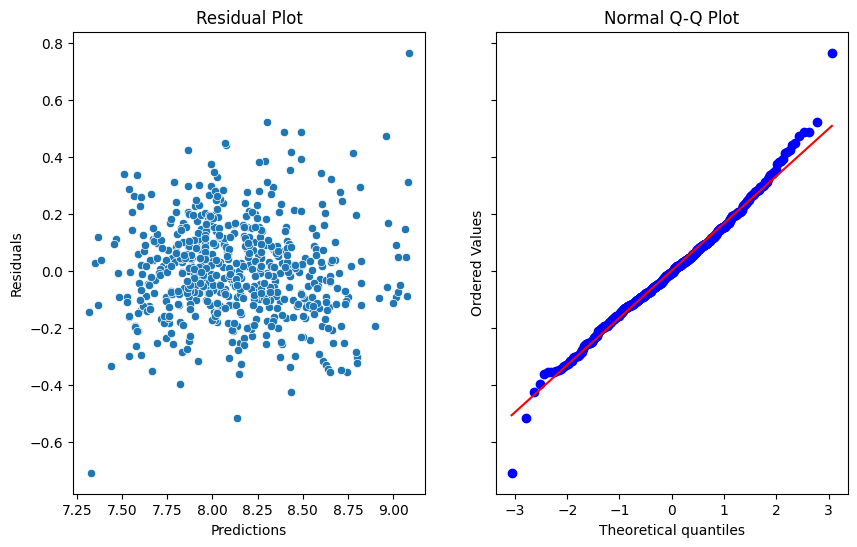

In [99]:
def residual_analysis(model):
    
    predictions=model.predict()
    residuals=model.resid
    fig , ax=plt.subplots(1,2, sharey='all',figsize=(10,6))

    sns.scatterplot(x=predictions, y=residuals , ax=ax[0])
    ax[0].set_title('Residual Plot')
    ax[0].set_xlabel("Predictions")
    ax[0].set_ylabel("Residuals")

    stats.probplot(residuals,dist='norm' , plot=ax[1])
    ax[1].set_title('Normal Q-Q Plot')
residual_analysis(model)

In [100]:
# checking the VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
variables=sm.OLS(y,x).exog
pd.Series([vif(variables,i) for i in range(variables.shape[1])],index=x.columns)

const                        60.620951
SQFT                         18.492514
BEDS                          3.231399
BATH                          2.301635
SQFT2                        12.206940
LAUNDRY_not_in_unit           1.441652
PETS_no_dogs                  1.094327
PARKING_(b) protected         7.660254
PARKING_(c) off-street        2.226349
PARKING_(d) no parking        8.330740
HOOD_DISTRICT_central         1.388141
HOOD_DISTRICT_marina          1.394577
HOOD_DISTRICT_north beach     1.442526
HOOD_DISTRICT_south west      1.338693
HOOD_DISTRICT_west            1.215802
dtype: float64